<a href="https://colab.research.google.com/github/hyunku/Brain-Machine_Interface_System/blob/main/make_pretrain_and_evaluate_personal_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 import

In [1]:
import joblib
print(f'joblib version: {joblib.__version__}') # check your joblib version is 1.1.0

joblib version: 1.1.0


In [2]:
!pip uninstall joblib

Found existing installation: joblib 1.2.0
Uninstalling joblib-1.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/joblib-1.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/joblib/*
Proceed (y/n)? y
  Successfully uninstalled joblib-1.2.0


In [3]:
!pip install joblib==1.1.0
# and then restart the kernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.2 MB/s 


In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.8 MB/s 


In [3]:
##필요 모듈 import
import os
import sys
import pandas as pd
import numpy as np
from scipy import signal
import mne
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import pyplot as plt
from datetime import datetime
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import math
from google.colab import drive
import joblib
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [4]:
print(f'joblib version: {joblib.__version__}') # check you joblib version is 1.1.0

joblib version: 1.1.0


# 2. 데이터 로드

In [5]:
eeg = pd.read_csv("/content/drive/MyDrive/MNE/make_pretrain/hyunku/eeg_2022-10-27_16-22-41.csv")
train = pd.read_csv("/content/drive/MyDrive/MNE/make_pretrain/hyunku/session_train_2022-10-27_16-22-49.csv")

In [6]:
eeg

,timestamp,ch0-time0,ch0-time1,ch0-time2,ch0-time3,ch0-time4,ch0-time5,ch0-time6,ch0-time7,ch0-time8,...,ch15-time52,ch15-time53,ch15-time54,ch15-time55,ch15-time56,ch15-time57,ch15-time58,ch15-time59,ch15-time60,ch15-time61
0,2022-10-27T16:22:42.291283,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
1,2022-10-27T16:22:42.799339,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
2,2022-10-27T16:22:43.304338,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3,2022-10-27T16:22:43.816351,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
4,2022-10-27T16:22:44.324351,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2022-10-27T16:56:16.095507,31.270090,-9947.621518,952.676052,-10252.141685,1392.044293,-10309.228040,1248.143762,-10120.959296,549.785858,...,-96652.921635,-96647.847789,-96649.211246,-96651.267606,-96645.634967,-96655.290920,-96645.746725,-96658.084888,-96640.136437,-96656.810839
3948,2022-10-27T16:56:16.605377,-2133.161084,-7878.520534,-3761.262150,-6607.332123,-5375.281617,-5122.617498,-6831.117789,-3507.189871,-8055.702812,...,-96634.056763,-96653.882760,-96633.877949,-96653.659243,-96629.564062,-96648.697156,-96631.463961,-96648.428935,-96632.134513,-96646.014946
3949,2022-10-27T16:56:17.114698,-9703.451062,644.870179,-10119.439378,1285.337065,-10274.918112,1380.443738,-10190.182649,898.383665,-9860.784991,...,-96629.362897,-96634.056763,-96634.548501,-96629.139379,-96635.129647,-96625.294879,-96635.755496,-96623.953774,-96637.677746,-96621.204510
3950,2022-10-27T16:56:17.624766,-8312.032618,-3096.923601,-7140.309470,-4734.099476,-5733.177749,-6274.224076,-4153.490562,-7592.418205,-2528.071705,...,-96633.788542,-96613.671972,-96632.603900,-96613.001420,-96635.107295,-96614.990725,-96631.754533,-96615.504815,-96629.876987,-96617.181196


In [7]:
# use 6chan data
eeg = eeg.iloc[:,:62*6+1]
eeg

,timestamp,ch0-time0,ch0-time1,ch0-time2,ch0-time3,ch0-time4,ch0-time5,ch0-time6,ch0-time7,ch0-time8,...,ch5-time52,ch5-time53,ch5-time54,ch5-time55,ch5-time56,ch5-time57,ch5-time58,ch5-time59,ch5-time60,ch5-time61
0,2022-10-27T16:22:42.291283,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
1,2022-10-27T16:22:42.799339,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
2,2022-10-27T16:22:43.304338,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3,2022-10-27T16:22:43.816351,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
4,2022-10-27T16:22:44.324351,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2022-10-27T16:56:16.095507,31.270090,-9947.621518,952.676052,-10252.141685,1392.044293,-10309.228040,1248.143762,-10120.959296,549.785858,...,3259.487839,-7820.160129,3092.006217,-7516.198756,2586.633275,-6874.100193,1737.691669,-5894.289123,586.085091,-4614.070608
3948,2022-10-27T16:56:16.605377,-2133.161084,-7878.520534,-3761.262150,-6607.332123,-5375.281617,-5122.617498,-6831.117789,-3507.189871,-8055.702812,...,-2296.351170,-1556.620187,-3780.886982,-87.976466,-5141.683536,1200.691009,-6272.145363,2215.974297,-7106.446577,2888.672398
3949,2022-10-27T16:56:17.114698,-9703.451062,644.870179,-10119.439378,1285.337065,-10274.918112,1380.443738,-10190.182649,898.383665,-9860.784991,...,-7848.457438,3189.325713,-7683.300398,2819.069066,-7172.719499,2109.647049,-6329.388181,1071.721443,-5162.649472,-217.974212
3950,2022-10-27T16:56:17.624766,-8312.032618,-3096.923601,-7140.309470,-4734.099476,-5733.177749,-6274.224076,-4153.490562,-7592.418205,-2528.071705,...,-2118.699505,-3258.772583,-610.582603,-4683.629237,759.020538,-5908.951868,1883.000360,-6851.524931,2684.690378,-7498.987913


# 3. 전처리 + 모델링

In [8]:
''' define parameters '''

# n_channels = 16 # hyunku
n_channels = 6 # yeonhee
s_freq = 128  # in Hertz
# ch_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'F3', 'F4', 'P3', 'P4'] # for 16 channel
ch_names = ['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8'] # for 6 channel
ch_types = ['eeg'] * n_channels
all_ch_names = ch_names + ['Task','STM']
all_ch_types = ch_types + ['misc','misc']
p_detrend = 1 # 0: OFF, 1: On
p_normalization = 1 # 0: do not, 1: [0, 1] scaling, 2: standardization (x-mean)/var
p_n_filenames = 7
p_ica_flag = 1
p_ts_psd_flag = 0
l_freqs = 1
h_freqs = 60

In [9]:
''' Function about extract filtered data from data measured by 0.5sec and extract bandpass data from data measuerd by 3sec'''

def filtering_bandpass_update(data):

##### make filtered data by 0.5sec

  info = mne.create_info(ch_names=ch_names, sfreq=s_freq, ch_types='eeg') # make info
  st_idx = 1
  time = 62
  ch_li = []

  # gather and average from buffer
  for chan in range(n_channels):
    ch_li.append(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].sum(axis=1) / len(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].T)) # 1 ~ 62*1 + 1, 62*1 + 1 ~ 62*2 + 1

  ch_df = pd.DataFrame(ch_li).T
  t = pd.DataFrame(data.iloc[:,0])

  # dataframe -> mne rawarray
  raw = mne.io.RawArray(ch_df.T, info, verbose=False)    # make mne object

  # filtering (by Hertz)
  raw_filtered = raw.filter(l_freq=60,h_freq=.5,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 0.5 ~ 60

  # make column names
  ch_names_arr = np.char.array(['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8']) # for 6 channel
  raw_filtered.columns = ch_names_arr

  # add time column
  df = pd.concat([t,raw_filtered], axis=1)
  origin_df = df.iloc[5:,:]
  origin_df.reset_index(drop=True, inplace=True)

  
##### make bandpass by 3sec

  # initialize info
  info = mne.create_info(ch_names=ch_names, sfreq=s_freq, ch_types='eeg') # make info
  st_idx = 1
  time = 62
  ch_li = []

  # gather and average from buffer
  for chan in range(n_channels):
    ch_li.append(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].sum(axis=1) / len(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].T)) # 1 ~ 62*1 + 1, 62*1 + 1 ~ 62*2 + 1

  ch_df = pd.DataFrame(ch_li).T

  # time rolling to gather 3sec data
  ch_df = ch_df.rolling(window=6).mean().iloc[5:,:]
  ch_df.reset_index(drop=True, inplace=True)

  # dataframe -> mne rawarray
  raw = mne.io.RawArray(ch_df.T, info, verbose=False)

  # get bandpass (by Hertz)
  delta_band = raw.filter(l_freq=4,h_freq=.5,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 0.5 ~ 4
  theta_band = raw.filter(l_freq=8,h_freq=4,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 4 ~ 8
  alpha_band = raw.filter(l_freq=12,h_freq=8,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 8 ~12
  beta_band = raw.filter(l_freq=30,h_freq=12,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 12 ~ 30
  gamma_band = raw.filter(l_freq=45,h_freq=30,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 30 ~ 45

  # make column names
  ch_names_arr = np.char.array(['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8']) # for 6 channel
  band_labels_arr = np.char.array(["-Delta", "-Theta", "-Alpha", "-Beta", "-Gamma"])
  ch_band_labels = ch_names_arr[np.newaxis, :] + band_labels_arr[:, np.newaxis]
  new_cols = ch_band_labels.flatten()

  # gather each bandpass data
  banded = pd.concat([delta_band, theta_band, alpha_band, beta_band, gamma_band], axis=1)
  banded.columns = new_cols

###### gather 0.5sec origin data and 3sec bandpass data

  filtered = pd.concat([origin_df, banded], axis=1)

  return filtered

In [10]:
# data filtering using by user-defined function
eeg = filtering_bandpass_update(eeg)
eeg

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 60 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 60.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 4.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-st

,timestamp,F7,F3,Fp1,Fp2,F4,F8,F7-Delta,F3-Delta,Fp1-Delta,...,Fp1-Beta,Fp2-Beta,F4-Beta,F8-Beta,F7-Gamma,F3-Gamma,Fp1-Gamma,Fp2-Gamma,F4-Gamma,F8-Gamma
0,2022-10-27T16:22:44.834352,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,...,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874986e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874986e+11
1,2022-10-27T16:22:45.344351,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,...,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11
2,2022-10-27T16:22:45.854351,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875003e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,...,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11,-1.874985e+11,-1.874985e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11
3,2022-10-27T16:22:46.366351,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875003e+11,-1.874985e+11,-1.874986e+11,-1.874985e+11,...,-1.874986e+11,-1.874987e+11,-1.874986e+11,-1.874987e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11,-1.874986e+11,-1.874987e+11
4,2022-10-27T16:22:46.874354,-1.875002e+11,-1.875002e+11,-1.875002e+11,-1.875003e+11,-1.875002e+11,-1.875003e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,...,-1.874986e+11,-1.874987e+11,-1.874986e+11,-1.874987e+11,-1.874985e+11,-1.874986e+11,-1.874986e+11,-1.874987e+11,-1.874986e+11,-1.874987e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,2022-10-27T16:56:16.095507,-4.969990e+09,-4.898335e+09,-2.973482e+09,-2.532632e+09,-2.712936e+09,-2.299354e+09,-5.285934e+09,-5.199002e+09,-3.080218e+09,...,-3.100458e+09,-2.633954e+09,-2.825256e+09,-2.398187e+09,-5.172683e+09,-5.099142e+09,-3.095445e+09,-2.628899e+09,-2.820111e+09,-2.392954e+09
3943,2022-10-27T16:56:16.605377,-5.010309e+09,-4.935939e+09,-2.978348e+09,-2.531692e+09,-2.714999e+09,-2.298022e+09,-5.205053e+09,-5.120580e+09,-3.036877e+09,...,-3.045134e+09,-2.582054e+09,-2.772371e+09,-2.349431e+09,-5.116263e+09,-5.041289e+09,-3.044580e+09,-2.581228e+09,-2.771843e+09,-2.348455e+09
3944,2022-10-27T16:56:17.114698,-4.975913e+09,-4.900556e+09,-2.966896e+09,-2.524864e+09,-2.707098e+09,-2.294179e+09,-5.140509e+09,-5.057828e+09,-3.009248e+09,...,-3.009733e+09,-2.549512e+09,-2.739408e+09,-2.319779e+09,-5.089896e+09,-5.012596e+09,-3.013326e+09,-2.553212e+09,-2.743139e+09,-2.323634e+09
3945,2022-10-27T16:56:17.624766,-4.992772e+09,-4.915255e+09,-2.966482e+09,-2.521899e+09,-2.705860e+09,-2.291879e+09,-5.094721e+09,-5.013123e+09,-3.003725e+09,...,-3.001179e+09,-2.542941e+09,-2.733476e+09,-2.315822e+09,-5.069604e+09,-4.990468e+09,-2.999081e+09,-2.540988e+09,-2.731230e+09,-2.313882e+09


In [11]:
train

,timestamp,event(1:up,-1:down)
0,'2022-10-27T16:22:51.614886',-1,NaN
1,'2022-10-27T16:23:00.622219',1,NaN
2,'2022-10-27T16:23:09.630175',-1,NaN
3,'2022-10-27T16:23:18.636132',1,NaN
4,'2022-10-27T16:23:27.641112',1,NaN
...,...,...,...
215,'2022-10-27T16:55:30.626386',1,NaN
216,'2022-10-27T16:55:39.631444',-1,NaN
217,'2022-10-27T16:55:48.637537',1,NaN
218,'2022-10-27T16:55:57.642748',1,NaN


In [12]:
# get ready to merge train data to eeg data

eeg['timestamp'] = pd.to_datetime(eeg['timestamp'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.rename(columns={' event(1:up':'event'})

eeg['event']=0

In [13]:
# deploy target data to eeg data by timestamp (merge train data and eeg data)

for i in range(0,len(train)-1):
  for t in range(0,len(eeg)):
    if train['timestamp'][i]< eeg['timestamp'][t] and (train['timestamp'][i+1]>eeg['timestamp'][t])==True:
       eeg.event[t]=train.event[i]

# drop the columns which doesn't have target data
eeg.drop(eeg.loc[eeg['event']==0].index, inplace=True)
eeg.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
eeg

,timestamp,F7,F3,Fp1,Fp2,F4,F8,F7-Delta,F3-Delta,Fp1-Delta,...,Fp2-Beta,F4-Beta,F8-Beta,F7-Gamma,F3-Gamma,Fp1-Gamma,Fp2-Gamma,F4-Gamma,F8-Gamma,event
0,2022-10-27 16:22:51.975656,-1.875003e+11,-1.875003e+11,-1.875003e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.874988e+11,-1.874988e+11,-1.874988e+11,...,-1.874990e+11,-1.874989e+11,-1.874990e+11,-1.874988e+11,-1.874988e+11,-1.874988e+11,-1.874990e+11,-1.874989e+11,-1.874990e+11,-1
1,2022-10-27 16:22:52.485638,-1.875003e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.874988e+11,-1.874989e+11,-1.874989e+11,...,-1.874990e+11,-1.874989e+11,-1.874991e+11,-1.874988e+11,-1.874989e+11,-1.874989e+11,-1.874990e+11,-1.874989e+11,-1.874991e+11,-1
2,2022-10-27 16:22:52.995638,-1.875003e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.874988e+11,-1.874989e+11,-1.874989e+11,...,-1.874990e+11,-1.874990e+11,-1.874991e+11,-1.874988e+11,-1.874989e+11,-1.874989e+11,-1.874990e+11,-1.874990e+11,-1.874991e+11,-1
3,2022-10-27 16:22:53.506200,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.874989e+11,-1.874989e+11,-1.874989e+11,...,-1.874991e+11,-1.874990e+11,-1.874992e+11,-1.874989e+11,-1.874989e+11,-1.874989e+11,-1.874991e+11,-1.874990e+11,-1.874992e+11,-1
4,2022-10-27 16:22:54.016199,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.875004e+11,-1.874989e+11,-1.874990e+11,-1.874990e+11,...,-1.874991e+11,-1.874991e+11,-1.874992e+11,-1.874989e+11,-1.874990e+11,-1.874990e+11,-1.874991e+11,-1.874991e+11,-1.874992e+11,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,2022-10-27 16:56:04.360027,-5.029730e+09,-4.997997e+09,-3.046545e+09,-2.601168e+09,-2.765888e+09,-2.333513e+09,-5.087250e+09,-5.056190e+09,-3.149099e+09,...,-2.652870e+09,-2.819963e+09,-2.383194e+09,-5.032089e+09,-5.005531e+09,-3.057575e+09,-2.608938e+09,-2.774727e+09,-2.339856e+09,1
3906,2022-10-27 16:56:04.870234,-5.073556e+09,-5.038423e+09,-3.108183e+09,-2.657808e+09,-2.826791e+09,-2.388077e+09,-5.096367e+09,-5.067090e+09,-3.195706e+09,...,-2.528478e+09,-2.694047e+09,-2.261680e+09,-5.008629e+09,-4.978493e+09,-3.003259e+09,-2.552425e+09,-2.719333e+09,-2.284521e+09,1
3907,2022-10-27 16:56:05.380834,-5.028395e+09,-4.992737e+09,-3.049773e+09,-2.604447e+09,-2.770894e+09,-2.339205e+09,-5.015905e+09,-4.990551e+09,-3.169476e+09,...,-2.498270e+09,-2.663265e+09,-2.234165e+09,-4.981392e+09,-4.950012e+09,-2.978091e+09,-2.531555e+09,-2.697523e+09,-2.266827e+09,1
3908,2022-10-27 16:56:05.890825,-5.064064e+09,-5.025939e+09,-3.088023e+09,-2.638218e+09,-2.808042e+09,-2.372060e+09,-5.018222e+09,-4.990918e+09,-3.163995e+09,...,-2.536154e+09,-2.703775e+09,-2.272053e+09,-4.955631e+09,-4.921875e+09,-2.954771e+09,-2.507535e+09,-2.674496e+09,-2.243845e+09,1


# 6. 선형 머신러닝 모델들

In [15]:
# data split to X / Y (input / target)
train_eeg=eeg.drop(['timestamp'],axis='columns')
train_eeg=train_eeg.iloc[:,:-1].values
train_event=eeg.drop(['timestamp'],axis='columns')
train_event=train_event.iloc[:,-1].values

# data split to train / test
train_length = math.ceil(len(eeg) * 0.9) # train data : 75% of data 
#test_length = len(eeg)-train_length
""" X_train = X[:train_length]
    y_train = X[1:train_length+1]
    X_test = X[train_length:train_length+test_length]
    y_test = X[train_length+1:train_length+test_length+1]
"""

X_train = train_eeg[:train_length]
y_train= train_event[:train_length]
X_test = train_eeg[train_length:]
y_test = train_event[train_length:]

In [16]:
X_test.shape

(391, 36)

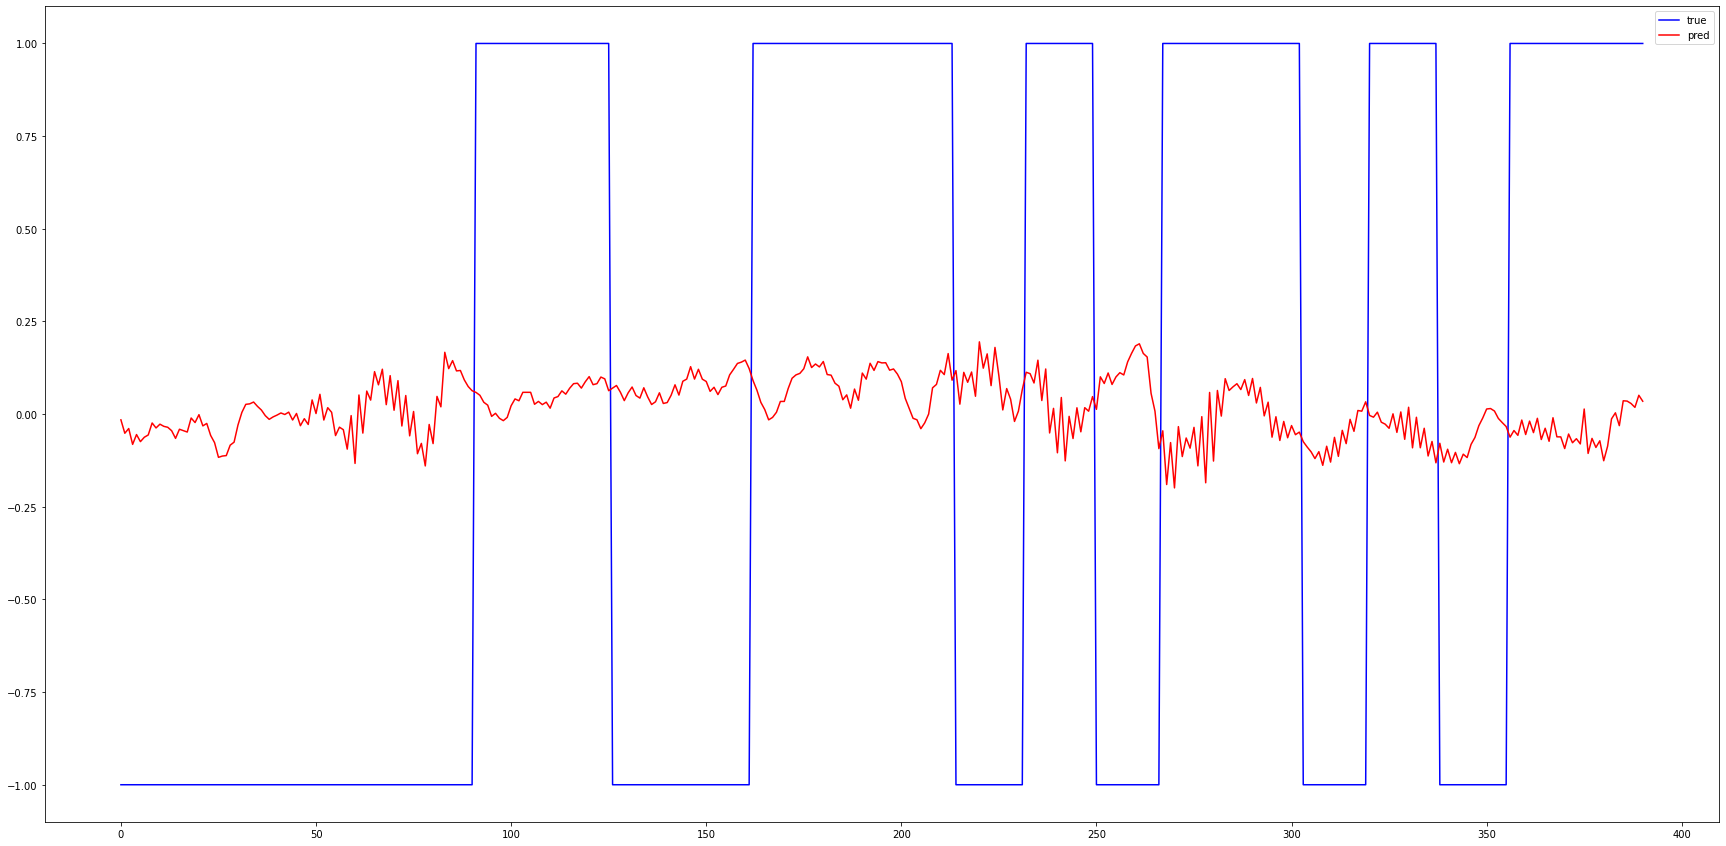

In [18]:
# LinearRegression

model = LinearRegression()
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.figure(figsize=(30,15))
# plt.ylim(-0.4,0.2)
plt.plot(y_test, 'b-', label='true')
plt.plot(y_pred, 'r-', label='pred')
plt.legend()

In [19]:
#y_pred Change to 1 and -1 compared to previous values
pred_sig=[]
if y_pred[0]>=0:
    pred_sig.append(1)
else:
    pred_sig.append(-1)
    
for i in range(len(y_pred)-1):
    if y_pred[i+1]-y_pred[i]>0.000:    ##
        pred_sig.insert(i+1, 1)
    else:
        pred_sig.insert(i+1,-1)
pred_sig=np.array(pred_sig)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_sig)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['pred_-1', 'pred_1']
cm_df.index = ['real_-1','real_1']
cm_df.T

,real_-1,real_1
pred_-1,97,100
pred_1,100,94


In [36]:
TP = cm_df.T.iloc[0,0]
FP = cm_df.T.iloc[0,1]
FN = cm_df.T.iloc[1,0]
TN = cm_df.T.iloc[1,1]
accuracy = (TP + TN) / (TP + FP + FN + TN)
accuracy

0.4884910485933504

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_sig))

              precision    recall  f1-score   support

          -1       0.49      0.49      0.49       197
           1       0.48      0.48      0.48       194

    accuracy                           0.49       391
   macro avg       0.49      0.49      0.49       391
weighted avg       0.49      0.49      0.49       391



In [37]:
# check entropy
# 0 : low Impurity
# 1 : high Impurity

from math import log2
N=2 #state
p=accuracy
entropy = log2(N) + p*log2(p) + (1-p)*log2((1-p)/(N-1))
entropy

0.0003822208762102597

In [23]:
# save pretrain model
joblib.dump(reg, '/content/drive/MyDrive/MNE/make_pretrain/hyunku/lin_model_hyunku.pkl')

['/content/drive/MyDrive/MNE/make_pretrain/hyunku/lin_model_hyunku.pkl']

In [ ]:
mymodel = joblib.load('/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/lin_model_hoeyoung.pkl')

In [ ]:
X_train.shape

(3198, 36)